In [49]:
import pandas as pd
df = pd.read_excel('Stream1.xlsx')
df.head(215)



,Country Name,Country Code,GDP,Inflation,Trade,EGL,Income_level
0,Afghanistan,AFG,-2.351101,8.057424,84.369054,low GDP,low income
1,Albania,ALB,-3.302082,1.620887,59.829729,low GDP,middle income
2,Algeria,DZA,-5.100000,2.415131,45.330511,low GDP,middle income
3,American Samoa,ASM,5.065359,8.057424,156.005587,very high GDP,high income
4,Andorra,AND,-11.183940,8.057424,84.369054,low GDP,high income
...,...,...,...,...,...,...,...
210,"Venezuela, RB",VEN,-5.065449,8.057424,84.369054,low GDP,low middle income
211,Vietnam,VNM,2.865412,3.220934,163.245857,medium GDP,middle income
212,Virgin Islands (U.S.),VIR,-2.147007,8.057424,114.961941,low GDP,high income
213,West Bank and Gaza,PSE,-11.318466,-0.735332,67.288191,low GDP,middle income


In [50]:
# Groupping the IncomeLevel and EGL columns and returning the resulting occurences
grouped = df.groupby(['Income_level', 'EGL']).size().reset_index(name='Frequency')
# naming the table indexe and column to suit our needs and the values inside as frequency
table = grouped.pivot(index='Income_level', columns='EGL', values='Frequency')
print(table)

EGL                high GDP  low GDP  medium GDP  very high GDP
Income_level                                                   
high income             1.0     77.0         1.0            3.0
low income              1.0     19.0         5.0            1.0
low middle income       NaN      1.0         NaN            NaN
middle income           8.0     91.0         8.0            1.0


In [51]:
# initialize empty Dict to hold income levels categories(key) and their frequencies(value)
# looping over the IL column; for every category, while finding an occurence,
# we increment by 1

IL_frequencies = {}
for val in df['Income_level']:
    if val in IL_frequencies:
        IL_frequencies[val] += 1
    else:
        IL_frequencies[val] = 1

# Calculate relative frequencies for Income_level categories
# we retrive the total number of records present in IL column (total_entries)
# then for every category(key) we calculate its relative frequency
# by deviding its value of frequency by the total number of records
# we use the keys and values of the IL_frequencies

IL_total_entries = len(df['Income_level'])
IL_relative_frequencies = {k: v / IL_total_entries for k, v in IL_frequencies.items()}


# SAME WORK HERE
EGL_frequencies = {}
for val in df['EGL']:
    if val in EGL_frequencies:
        EGL_frequencies[val] += 1
    else:
        EGL_frequencies[val] = 1

EGL_total_entries = len(df['EGL'])
EGL_relative_frequencies = {k: v / EGL_total_entries for k, v in EGL_frequencies.items()}





# # Create the table
stat_table = pd.DataFrame({
    'Income_level': list(IL_frequencies.keys()),# IL categories from the IL_frequencies dict (keys)
    'IncomeLevel_frequencies': list(IL_frequencies.values()),# IL categories frequencies from the IL_frequencies dict (values)
    'IncomeLevel_relative_frequencies': list(IL_relative_frequencies.values()),# IL categories relative frequencies from the IL_relative_frequencies dict (values)
    'EGL': list(EGL_frequencies.keys()),# EGL categories from the EGL_frequencies dict (keys)
    'EGL_frequencies': list(EGL_frequencies.values()),# EGL categories frequencies from the EGL_frequencies dict (values)
    'EGL_relative_frequencies': list(EGL_relative_frequencies.values())# EGL categories relative frequencies from the EGL_relative_frequencies dict (values)
})

print(stat_table)


        Income_level  IncomeLevel_frequencies  \
0         low income                       26   
1      middle income                      108   
2        high income                       82   
3  low middle income                        1   

   IncomeLevel_relative_frequencies            EGL  EGL_frequencies  \
0                          0.119816        low GDP              188   
1                          0.497696  very high GDP                5   
2                          0.377880       high GDP               10   
3                          0.004608     medium GDP               14   

   EGL_relative_frequencies  
0                  0.866359  
1                  0.023041  
2                  0.046083  
3                  0.064516  


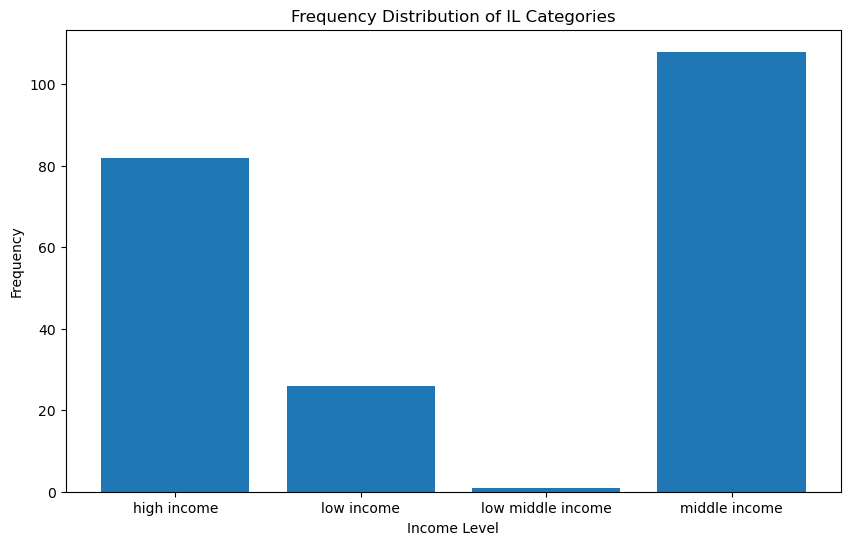

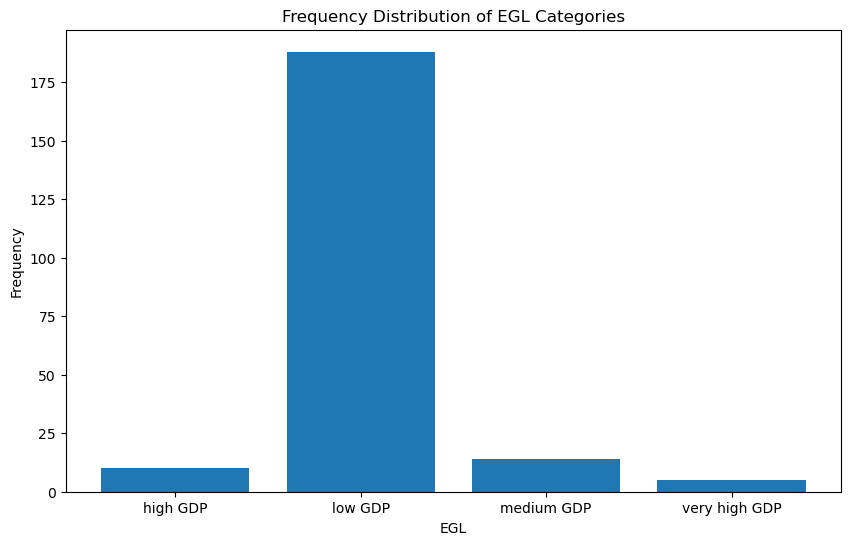

In [56]:
# Sort frequencies by keys for consistent plotting
sorted_IL_categories = sorted(IL_frequencies.keys())
sorted_IL_frequencies = [IL_frequencies[cat] for cat in sorted_IL_categories]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_IL_categories, sorted_IL_frequencies)
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of IL Categories')
plt.show()

sorted_EGL_categories = sorted(EGL_frequencies.keys())
sorted_EGL_frequencies = [EGL_frequencies[cat] for cat in sorted_EGL_categories]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_EGL_categories, sorted_EGL_frequencies)
plt.xlabel('EGL')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of EGL Categories')
plt.show()









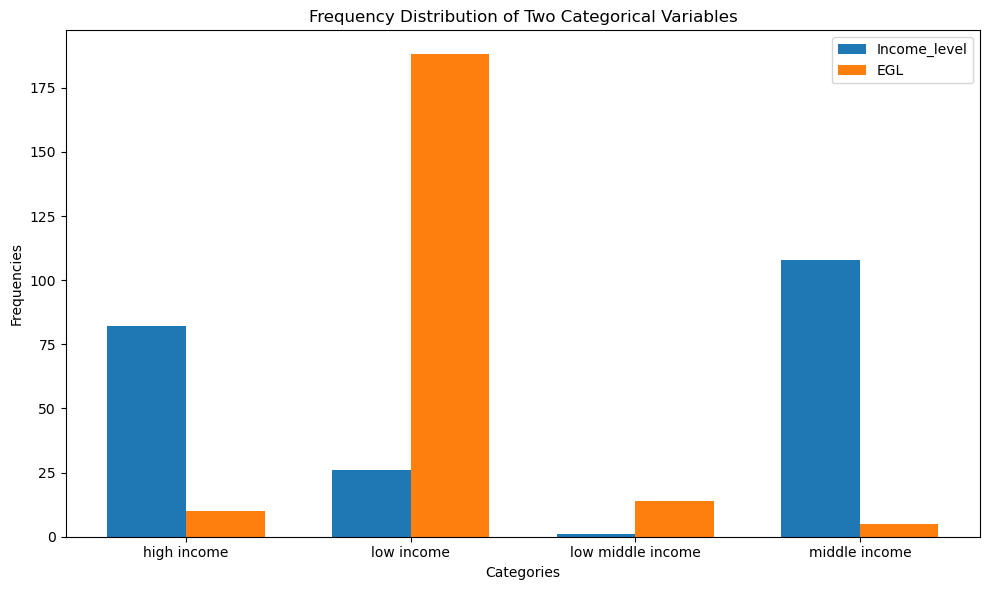

In [57]:
import matplotlib.pyplot as plt

# Assuming you have sorted frequencies for Income_level (IL) and EGL
# sorted_IL_categories, sorted_IL_frequencies, sorted_EGL_categories, sorted_EGL_frequencies

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(sorted_IL_categories))

# Plotting the bars for Income_level
bars1 = plt.bar(index, sorted_IL_frequencies, bar_width, label='Income_level')

# Adjusting the x positions for the bars for EGL
index = [i + bar_width for i in index]
bars2 = plt.bar(index, sorted_EGL_frequencies, bar_width, label='EGL')

plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.title('Frequency Distribution of Two Categorical Variables')
plt.xticks([i + bar_width / 2 for i in range(len(sorted_IL_categories))], sorted_IL_categories)
plt.legend()

plt.tight_layout()
plt.show()